In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.metrics import accuracy_score , classification_report

In [218]:
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [219]:
titanic_data = titanic_data.dropna(subset=['survived'])
# Remove the rows where target column 'survived' is missing NAN 
# This ensures our target variable 'Y' has no missing values

In [220]:
titanic_data.shape

(891, 15)

In [221]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [222]:
X = titanic_data[['pclass' , 'sex' , 'age' , 'sibsp' , 'parch' , 'fare']]
Y = titanic_data['survived']

In [223]:
Y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [224]:
X

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [225]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [226]:
X.loc[:, 'sex'] = X['sex'].map({'female' : 0 , 'male' : 1})

In [227]:
X.loc[:, 'age'].fillna(X['age'].median() , inplace=True)

C:\Users\Chinna Joka\AppData\Local\Temp\ipykernel_12448\3940198160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.loc[:, 'age'].fillna(X['age'].median() , inplace=True)
C:\Users\Chinna Joka\AppData\Local\Temp\ipykernel_12448\3940198160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'age'].fillna(X['age'].median() , inplace

In [228]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 , stratify=Y)

In [229]:
RF_classifier = RandomForestClassifier(n_estimators=100 , random_state=42)
RF_classifier.fit(X_train , Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [230]:
Y_pred = RF_classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [231]:
print(f"Accuracy Score : {accuracy_score(Y_test , Y_pred):.2f}")

Accuracy Score : 0.81


In [232]:
Classification_Report = classification_report(Y_test , Y_pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



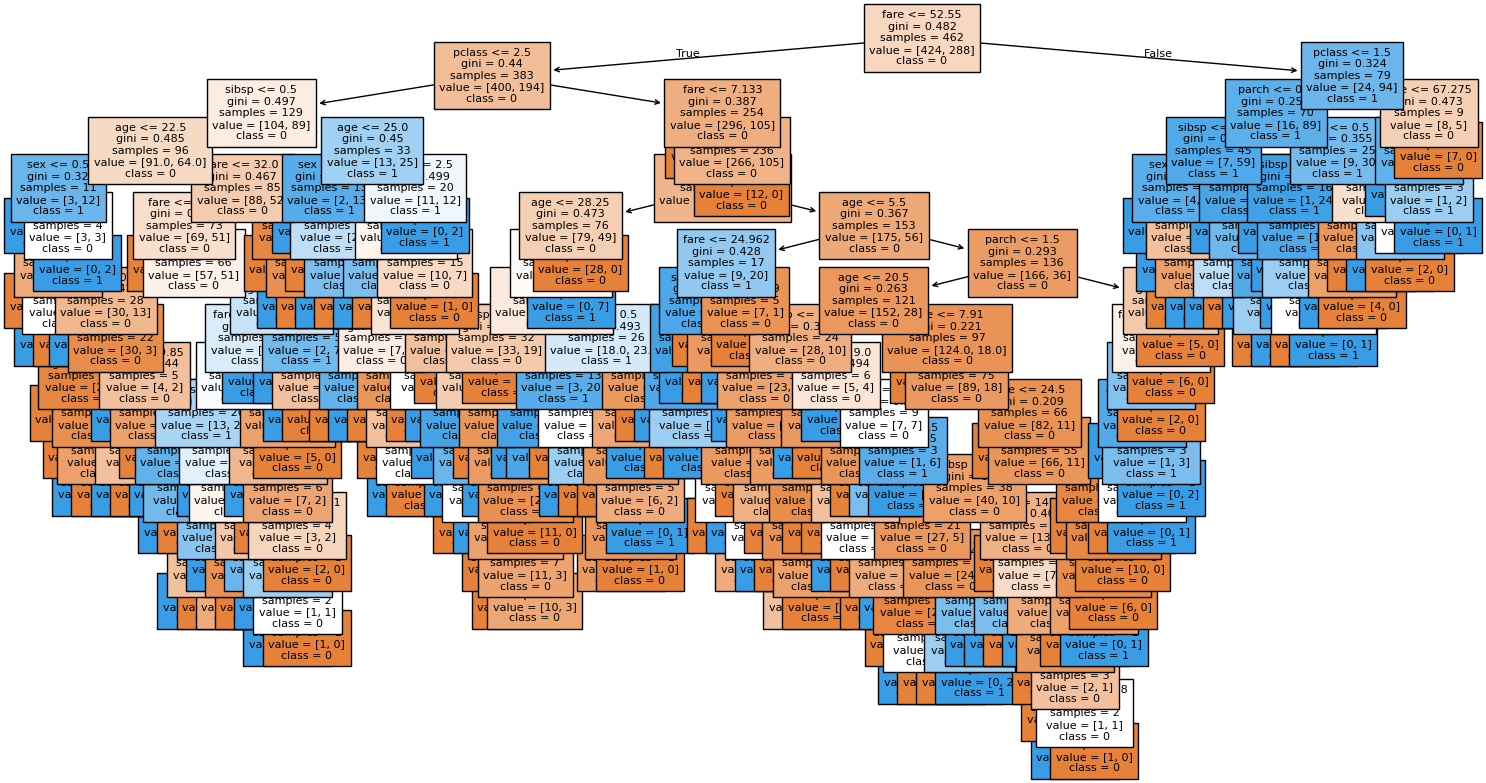

In [247]:
trees = RF_classifier.estimators_[85]
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
tree.plot_tree(
    trees,
    feature_names=X.columns,          # use column names, not full X
    class_names=[str(cls) for cls in sorted(set(Y))],  # unique class labels as strings
    filled=True,
    fontsize=8
)
plt.tight_layout()
plt.show()

In [ ]:
X_test = X_test.reset_index(drop=True)
sample = X_test.loc[0:1]
prediction = RF_classifier.predict(sample)
sample_dict = sample.iloc[0].to_dict()

print(f"Sample Passanger : {sample_dict}")
print('Survived' if prediction[0] == 1 else "Did Not Survived")

Sample Passanger : {'pclass': 3, 'sex': 1, 'age': 24.0, 'sibsp': 2, 'parch': 0, 'fare': 24.15}
Did Not Survived
